In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("cleaned_DA_salaries.csv")
df

,Job Title,Salary Estimate,Company Name,Location,Size,Type of ownership,Industry,Sector
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),Squarespace\n3.4,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology
3,Data Analyst,$37K-$66K (Glassdoor est.),Celerity\n4.1,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),FanDuel\n3.9,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation"
...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),"Avacend, Inc.\n2.5","Denver, CO",51 to 200 employees,Company - Private,Staffing & Outsourcing,Business Services
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Arrow Electronics\n2.9,"Centennial, CO",10000+ employees,Company - Public,Wholesale,Business Services
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),Spiceorb,"Denver, CO",-1,-1,-1,-1
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Contingent Network Services\n3.1,"Centennial, CO",201 to 500 employees,Company - Private,Enterprise Software & Network Solutions,Information Technology


In [3]:
#Clean up the-1 values and adding them to the "Unknown" group
df["Size"]=df["Size"].replace({'-1':'Unknown'})
company_size=df.groupby("Size").nunique()
company_size

,Job Title,Salary Estimate,Company Name,Location,Size,Type of ownership,Industry,Sector
Size,,,,,,,,
1 to 50 employees,239,82,268,93,1,12,39,20
10000+ employees,291,83,193,98,1,8,54,19
1001 to 5000 employees,249,84,230,103,1,10,54,23
201 to 500 employees,165,80,185,72,1,11,44,20
5001 to 10000 employees,81,52,74,42,1,7,29,15
501 to 1000 employees,152,80,138,71,1,5,39,21
51 to 200 employees,222,82,261,110,1,10,44,23
Unknown,148,74,165,74,1,5,7,6


In [4]:
df=df.replace({'-1':np.NaN})
df

,Job Title,Salary Estimate,Company Name,Location,Size,Type of ownership,Industry,Sector
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),Squarespace\n3.4,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology
3,Data Analyst,$37K-$66K (Glassdoor est.),Celerity\n4.1,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),FanDuel\n3.9,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation"
...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),"Avacend, Inc.\n2.5","Denver, CO",51 to 200 employees,Company - Private,Staffing & Outsourcing,Business Services
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Arrow Electronics\n2.9,"Centennial, CO",10000+ employees,Company - Public,Wholesale,Business Services
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),Spiceorb,"Denver, CO",Unknown,NaN,NaN,NaN
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Contingent Network Services\n3.1,"Centennial, CO",201 to 500 employees,Company - Private,Enterprise Software & Network Solutions,Information Technology


In [5]:
df=df.dropna()
df

,Job Title,Salary Estimate,Company Name,Location,Size,Type of ownership,Industry,Sector
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),Squarespace\n3.4,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology
3,Data Analyst,$37K-$66K (Glassdoor est.),Celerity\n4.1,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),FanDuel\n3.9,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation"
...,...,...,...,...,...,...,...,...
2247,Marketing/Communications - Data Analyst-Marketing,$78K-$104K (Glassdoor est.),APN Software Services Inc.\n4.1,"Broomfield, CO",51 to 200 employees,Company - Private,Computer Hardware & Software,Information Technology
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),"Avacend, Inc.\n2.5","Denver, CO",51 to 200 employees,Company - Private,Staffing & Outsourcing,Business Services
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Arrow Electronics\n2.9,"Centennial, CO",10000+ employees,Company - Public,Wholesale,Business Services
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Contingent Network Services\n3.1,"Centennial, CO",201 to 500 employees,Company - Private,Enterprise Software & Network Solutions,Information Technology


In [6]:
#Cleaning 'LoanRange' column by getting rid of unnecessary text
minimum_salary = df['Salary Estimate'].apply(lambda x: x.split('-')[0])
maximum_salary = df['Salary Estimate'].apply(lambda x: x.split('-')[1])
subtract_glassdoor_unit = maximum_salary.apply(lambda x: x.replace('(Glassdoor est.)', ''))
maximum_salary= subtract_glassdoor_unit
# #Separting loan range into minimum and maximum values 
# #Cleaning up commas and converting data type to integer
minimum_salary = minimum_salary.apply(lambda x: x.replace('K', ''))
maximum_salary = maximum_salary.apply(lambda x: x.replace('K', ''))
minimum_salary = minimum_salary.apply(lambda x: int(x.replace('$', '')))
maximum_salary = maximum_salary.apply(lambda x: int(x.replace('$', '')))


In [7]:
company_size=df.groupby("Size").nunique()
company_size

,Job Title,Salary Estimate,Company Name,Location,Size,Type of ownership,Industry,Sector
Size,,,,,,,,
1 to 50 employees,186,77,195,76,1,11,38,19
10000+ employees,287,83,188,97,1,8,53,18
1001 to 5000 employees,244,84,224,102,1,10,53,22
201 to 500 employees,156,78,174,72,1,11,43,19
5001 to 10000 employees,80,52,73,42,1,7,28,14
501 to 1000 employees,151,80,133,70,1,5,38,20
51 to 200 employees,196,81,228,106,1,9,43,22
Unknown,8,8,6,5,1,3,6,5


In [8]:
df['Min Salary']= minimum_salary
df['Max Salary']= maximum_salary
df

C:\Users\elisa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\elisa\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Job Title,Salary Estimate,Company Name,Location,Size,Type of ownership,Industry,Sector,Min Salary,Max Salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,37,66
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,37,66
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),Squarespace\n3.4,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,37,66
3,Data Analyst,$37K-$66K (Glassdoor est.),Celerity\n4.1,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,37,66
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),FanDuel\n3.9,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",37,66
...,...,...,...,...,...,...,...,...,...,...
2247,Marketing/Communications - Data Analyst-Marketing,$78K-$104K (Glassdoor est.),APN Software Services Inc.\n4.1,"Broomfield, CO",51 to 200 employees,Company - Private,Computer Hardware & Software,Information Technology,78,104
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),"Avacend, Inc.\n2.5","Denver, CO",51 to 200 employees,Company - Private,Staffing & Outsourcing,Business Services,78,104
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Arrow Electronics\n2.9,"Centennial, CO",10000+ employees,Company - Public,Wholesale,Business Services,78,104
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Contingent Network Services\n3.1,"Centennial, CO",201 to 500 employees,Company - Private,Enterprise Software & Network Solutions,Information Technology,78,104


In [9]:
company_size=df.groupby("Size").nunique()
company_size

,Job Title,Salary Estimate,Company Name,Location,Size,Type of ownership,Industry,Sector,Min Salary,Max Salary
Size,,,,,,,,,,
1 to 50 employees,186,77,195,76,1,11,38,19,48,52
10000+ employees,287,83,188,97,1,8,53,18,49,56
1001 to 5000 employees,244,84,224,102,1,10,53,22,50,56
201 to 500 employees,156,78,174,72,1,11,43,19,48,55
5001 to 10000 employees,80,52,73,42,1,7,28,14,38,42
501 to 1000 employees,151,80,133,70,1,5,38,20,50,56
51 to 200 employees,196,81,228,106,1,9,43,22,50,57
Unknown,8,8,6,5,1,3,6,5,8,8


In [10]:
average_min_pay=df.groupby("Size").mean()['Min Salary']
average_max_pay=df.groupby("Size").mean()['Max Salary']
average_min_pay

Size
1 to 50 employees          56.381679
10000+ employees           51.915989
1001 to 5000 employees     54.792398
201 to 500 employees       53.285106
5001 to 10000 employees    55.593750
501 to 1000 employees      54.451456
51 to 200 employees        54.041995
Unknown                    59.500000
Name: Min Salary, dtype: float64

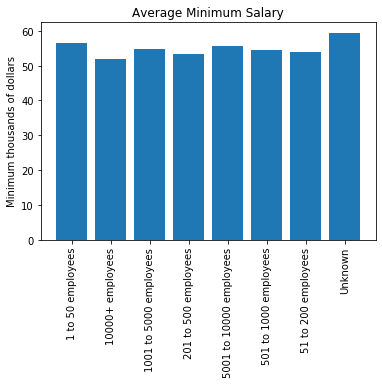

In [11]:
x=company_size.index
plt.bar(x, average_min_pay)
plt.title("Average Minimum Salary")
plt.xticks(x, rotation="vertical")
plt.ylabel("Minimum thousands of dollars")
plt.show()

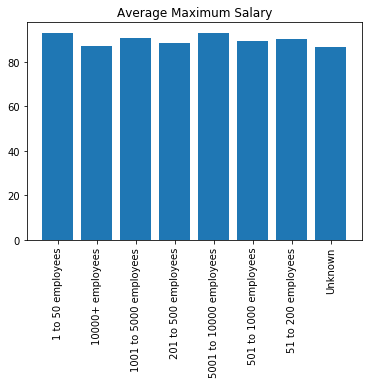

In [12]:
plt.bar(x, average_max_pay)
plt.title("Average Maximum Salary")
plt.xticks(x, rotation="vertical")
plt.show()

In [22]:
industry_type=df.groupby("Industry").nunique()
industry_type=industry_type.sort_values("Company Name",ascending=False) 
top_industry_type=industry_type.head(10)
top_industry_type

,Job Title,Salary Estimate,Company Name,Location,Size,Type of ownership,Industry,Sector,Min Salary,Max Salary
Industry,,,,,,,,,,
IT Services,189,81,166,77,8,7,1,1,51,55
Staffing & Outsourcing,202,78,148,91,8,6,1,1,50,53
Health Care Services & Hospitals,124,64,110,55,7,9,1,1,45,46
Consulting,86,59,77,50,7,3,1,1,38,45
Computer Hardware & Software,83,52,74,41,7,4,1,1,39,38
Enterprise Software & Network Solutions,45,48,55,34,7,2,1,1,37,34
Internet,47,32,49,18,6,3,1,1,24,26
Investment Banking & Asset Management,71,42,44,27,7,5,1,1,31,32
Advertising & Marketing,37,36,37,23,7,3,1,1,29,30


In [26]:
average_min_pay_perIndustry=df.groupby("Industry").mean()['Min Salary']
average_max_pay_perIndustry=df.groupby("Industry").mean()['Max Salary']
average_min_pay_perIndustry

Industry
Accounting                              59.153846
Advertising & Marketing                 53.176471
Aerospace & Defense                     51.954545
Architectural & Engineering Services    52.461538
Audiovisual                             24.000000
                                          ...    
Utilities                               67.000000
Vehicle Dealers                         39.000000
Venture Capital & Private Equity        62.833333
Video Games                             50.800000
Wholesale                               58.333333
Name: Min Salary, Length: 88, dtype: float64

In [28]:
top_ten_min_avg=average_min_pay_perIndustry.loc[top_industry_type.index]
top_ten_min_avg

Industry
IT Services                                53.304615
Staffing & Outsourcing                     55.521739
Health Care Services & Hospitals           55.364238
Consulting                                 53.369369
Computer Hardware & Software               57.603604
Enterprise Software & Network Solutions    58.028986
Internet                                   58.430769
Investment Banking & Asset Management      48.525641
Advertising & Marketing                    53.176471
Banks & Credit Unions                      51.509804
Name: Min Salary, dtype: float64

In [30]:
top_ten_max_avg=average_max_pay_perIndustry.loc[top_industry_type.index]
top_ten_max_avg

Industry
IT Services                                 89.393846
Staffing & Outsourcing                      90.953416
Health Care Services & Hospitals            90.251656
Consulting                                  88.612613
Computer Hardware & Software                97.693694
Enterprise Software & Network Solutions     96.623188
Internet                                   100.892308
Investment Banking & Asset Management       82.628205
Advertising & Marketing                     92.019608
Banks & Credit Unions                       83.058824
Name: Max Salary, dtype: float64